In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vedhashniv/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Data Loading
Load the dataset and show its info and statistics

In [ ]:
# Load the dataset
dataset = pd.read_csv('spam_ham_dataset.csv')
dataset.shape

(5171, 4)

In [ ]:
# Show dataset head (first 5 records)
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#dopping/Removing the Unnamed column from the DataFrame.
col_names = dataset.columns
dataset = dataset.drop(dataset.columns[0],axis=1)
for c in col_names:
    dataset = dataset.replace("?", np.NaN)
dataset = dataset.apply(lambda x: x.fillna(x.value_counts().index[0]))
dataset

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [ ]:
# Show dataset statistics
dataset.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Data Visualization
Visualize dataset features frequencies to get some insights

/Users/vedhashniv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


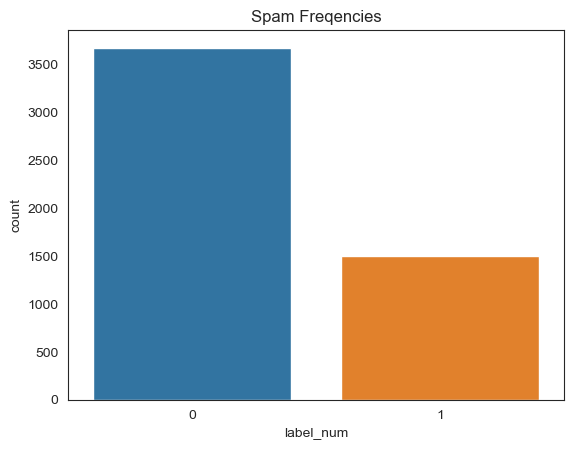

In [ ]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['label_num'])
plt.title("Spam Freqencies")
plt.show()

## Data Cleaning
Handling missing values and check for duplicates

In [ ]:
# Check for missing data for each column
dataset.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [ ]:
# Check for duplicates and remove them
dataset.drop_duplicates(inplace=True)


In [ ]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])

In [ ]:
# Save the vectorizer
dump(message, open("vectorizer.pkl", "wb"))

## Data Splitting
Split the dataset into training and testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['label_num'], test_size=0.20, random_state=0)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

Text(0, 0.5, 'prediction')

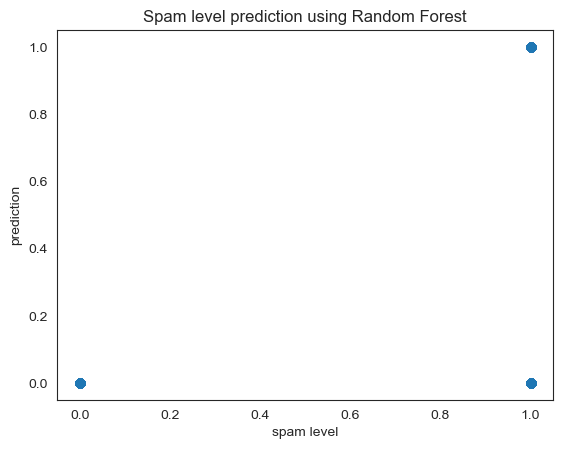

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.title("Spam level prediction using Random Forest")
plt.xlabel("spam level")
plt.ylabel("prediction")

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.8487731597396094
0.8478478478478478


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       722
           1       1.00      0.45      0.62       277

    accuracy                           0.85       999
   macro avg       0.91      0.73      0.76       999
weighted avg       0.87      0.85      0.83       999



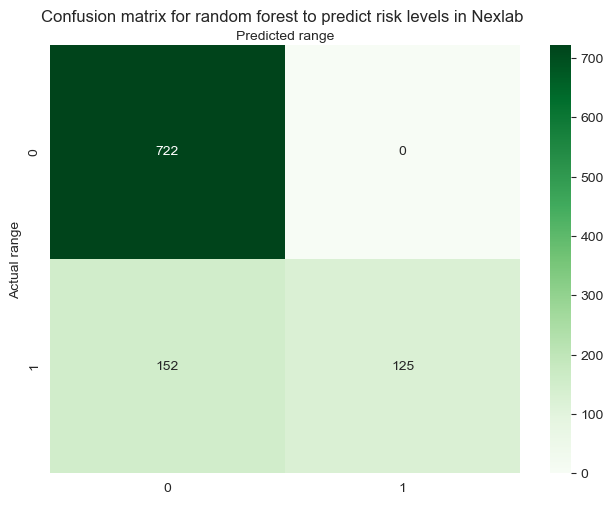

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest to predict risk levels in Nexlab ')
plt.ylabel('Actual range')
plt.xlabel('Predicted range')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model predictions

y_pred1 = knn.predict(X_test)

/Users/vedhashniv/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'prediction')

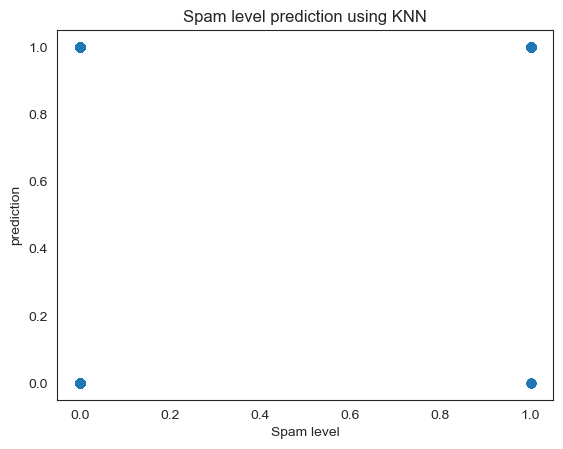

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred1)
plt.title("Spam level prediction using KNN")
plt.xlabel("Spam level")
plt.ylabel("prediction")

In [ ]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.8600400600901352
0.8118118118118118


/Users/vedhashniv/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
# classification report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       722
           1       0.60      0.96      0.74       277

    accuracy                           0.81       999
   macro avg       0.79      0.86      0.80       999
weighted avg       0.87      0.81      0.82       999



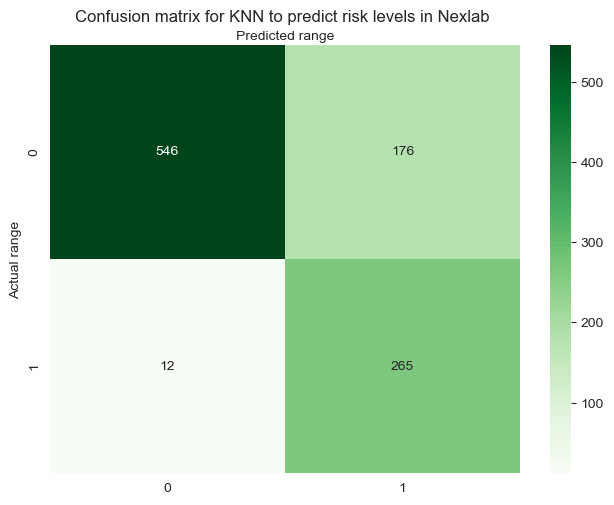

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for KNN to predict risk levels in Nexlab ')
plt.ylabel('Actual range')
plt.xlabel('Predicted range')
plt.show()

## Modal Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Random Forest Classifier'],
    'Score': [100*round(knn_acc,4), 100*round(ran_clf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest Classifier,84.78
0,KNN,81.18


## Prediction Graph Of Two Models

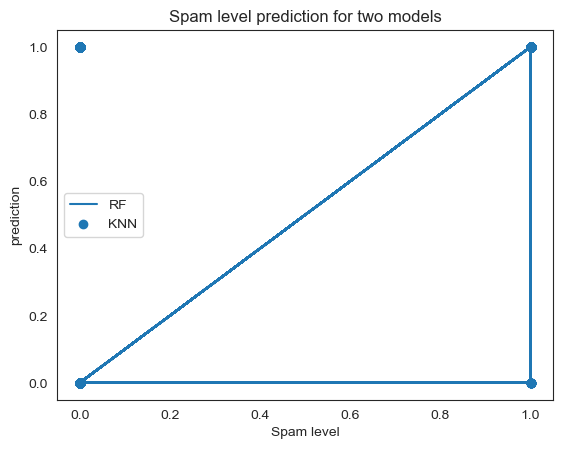

In [ ]:
import matplotlib.pyplot as plt1
plt1.plot(y_test,y_pred)
plt1.scatter(y_test,y_pred1)
plt1.title("Spam level prediction for two models")
plt1.xlabel("Spam level")
plt1.ylabel("prediction")
plt1.legend(('RF', 'KNN'))

In [ ]:
import pickle
filename="spamdetection.pkl"
model = rand_clf
f= open(filename,'wb')
pickle.dump(model, f)